In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
def visualization(x,y,xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x,y],color=['red','green'],label=['exist','not_exist'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No of customers",fontsize=20)
    plt.legend()

In [7]:
df_churn_exited=df[df['Exited']==1]['Tenure']
df_churn_not_exited=df[df['Exited']==0]['Tenure']

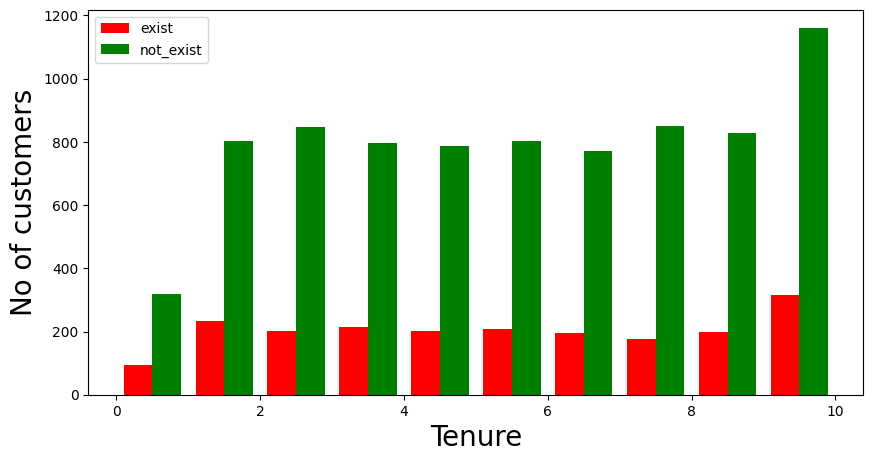

In [8]:
visualization(df_churn_exited , df_churn_not_exited , "Tenure")

In [9]:
df_churn_exited2=df[df['Exited']==1]['Age']
df_churn_not_exited2=df[df['Exited']==0]['Age']

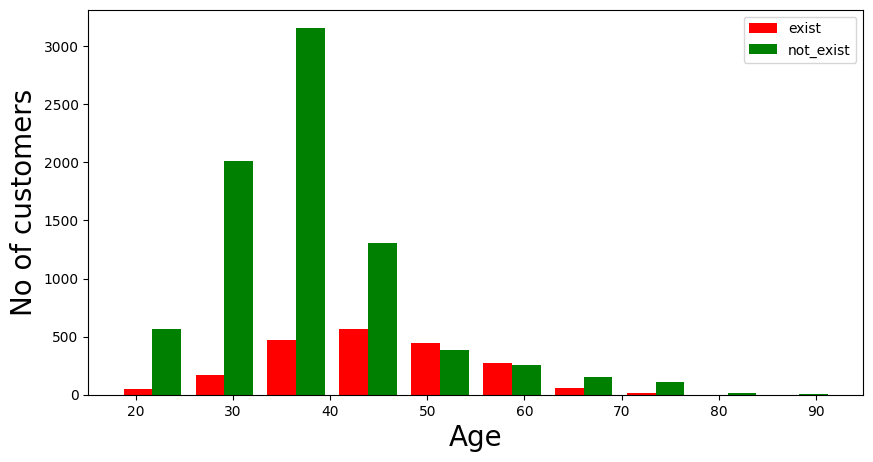

In [10]:
visualization(df_churn_exited2 , df_churn_not_exited2 , 'Age')

In [11]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [12]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [13]:
df=pd.concat([df,gender,states],axis=1)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [14]:
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y=df[['Exited']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
import keras

In [19]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [23]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) 

In [24]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) 

In [25]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
classifier.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7901 - loss: 0.5765
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.4294
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7955 - loss: 0.4195
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8040 - loss: 0.4183
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4130
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.4221
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.4089
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8296 - loss: 0.4145
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8273 - loss: 0.4136
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8460 - loss: 0.3920
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8346 - loss: 0.4038
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [30]:
y_pred =classifier.predict(x_test)
print(y_pred)
print(y_pred.shape)
y_pred = (y_pred > 0.5)
print(y_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.18187019]
 [0.07241462]
 [0.28496048]
 ...
 [0.12690538]
 [0.08809592]
 [0.23454626]]
(3000, 1)
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [32]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2306,   80],
       [ 421,  193]], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.833

Text(95.72222222222221, 0.5, 'Truth')

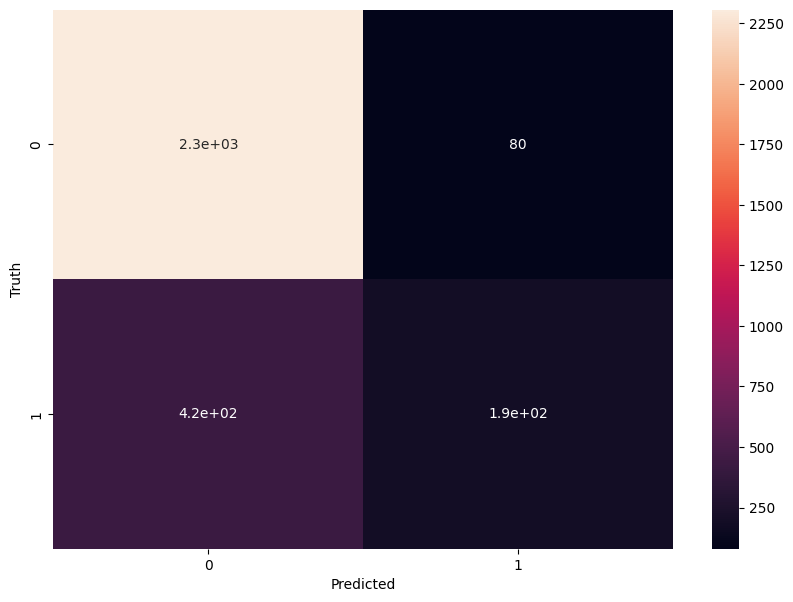

In [34]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2386
           1       0.71      0.31      0.44       614

    accuracy                           0.83      3000
   macro avg       0.78      0.64      0.67      3000
weighted avg       0.82      0.83      0.81      3000



In [36]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]

In [37]:
new_customer = sc.transform(sc.transform(new_customer))

C:\Program Files\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Program Files\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
new_prediction = classifier.predict(new_customer)
new_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.]], dtype=float32)

In [39]:
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])